<a href="https://colab.research.google.com/github/OttoBoop/EstatisticaPopRenda/blob/main/Trabalho_estat%C3%ADstica_2_0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1: Plotando logs e Regressões Básicas


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [80]:
import pandas as pd

# Olha só, qualquer um pode pegar os dados automaticamente do meu github!
url_dados = 'https://github.com/OttoBoop/EstatisticaPopRenda/raw/main/Dados.xlsx'

df = pd.read_excel(url_dados, engine='openpyxl')

df


,cod_micro,nome_micro,emprego2000,emprego2010,renda2000,renda2010
0,11001,Porto Velho (RO),146736,238960,700.89,1535.09
1,11002,Guajará-Mirim (RO),19940,26231,531.14,968.71
2,11003,Ariquemes (RO),48630,72008,587.29,1111.23
3,11004,Ji-Paraná (RO),106410,121458,540.79,1138.42
4,11005,Alvorada D'Oeste (RO),23160,25998,428.24,969.38
...,...,...,...,...,...,...
553,52015,Meia Ponte (GO),133680,173988,593.11,1181.30
554,52016,Pires do Rio (GO),34428,44312,566.06,1117.89
555,52017,Catalão (GO),49738,71473,499.05,1358.20
556,52018,Quirinópolis (GO),38891,55106,515.58,1335.89


In [81]:
# Informações gerais sobre o DataFrame
print(df.info())

# Estatísticas descritivas
print(df.describe())

# Verificar valores ausentes
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_micro    558 non-null    int64  
 1   nome_micro   558 non-null    object 
 2   emprego2000  558 non-null    int64  
 3   emprego2010  558 non-null    int64  
 4   renda2000    558 non-null    float64
 5   renda2010    558 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 26.3+ KB
None
          cod_micro   emprego2000   emprego2010    renda2000    renda2010
count    558.000000  5.580000e+02  5.580000e+02   558.000000   558.000000
mean   31319.586022  1.086350e+05  1.445484e+05   445.098315   972.567599
std    10396.659812  3.167529e+05  4.112704e+05   179.485313   319.260064
min    11001.000000  1.109000e+03  1.605000e+03   129.600000   431.320000
25%    24007.250000  2.695350e+04  3.467450e+04   281.510000   682.010000
50%    31027.500000  5.130500e+04  6.514650e+04 

In [82]:
# Calcular o logaritmo natural de 'emprego2000' e 'renda2000'
df['log_emprego2000'] = np.log(df['emprego2000'])
df["log_emprego2010"] = np.log(df["emprego2010"])
df['log_renda2000'] = np.log(df['renda2000'])
df["log_renda2010"] = np.log(df["renda2010"])
df


,cod_micro,nome_micro,emprego2000,emprego2010,renda2000,renda2010,log_emprego2000,log_emprego2010,log_renda2000,log_renda2010
0,11001,Porto Velho (RO),146736,238960,700.89,1535.09,11.896390,12.384051,6.552351,7.336344
1,11002,Guajará-Mirim (RO),19940,26231,531.14,968.71,9.900483,10.174697,6.275026,6.875965
2,11003,Ariquemes (RO),48630,72008,587.29,1111.23,10.791996,11.184533,6.375519,7.013223
3,11004,Ji-Paraná (RO),106410,121458,540.79,1138.42,11.575055,11.707324,6.293031,7.037397
4,11005,Alvorada D'Oeste (RO),23160,25998,428.24,969.38,10.050182,10.165775,6.059684,6.876657
...,...,...,...,...,...,...,...,...,...,...
553,52015,Meia Ponte (GO),133680,173988,593.11,1181.30,11.803204,12.066742,6.385380,7.074371
554,52016,Pires do Rio (GO),34428,44312,566.06,1117.89,10.446625,10.699011,6.338700,7.019198
555,52017,Catalão (GO),49738,71473,499.05,1358.20,10.814525,11.177075,6.212706,7.213916
556,52018,Quirinópolis (GO),38891,55106,515.58,1335.89,10.568518,10.917014,6.245292,7.197353


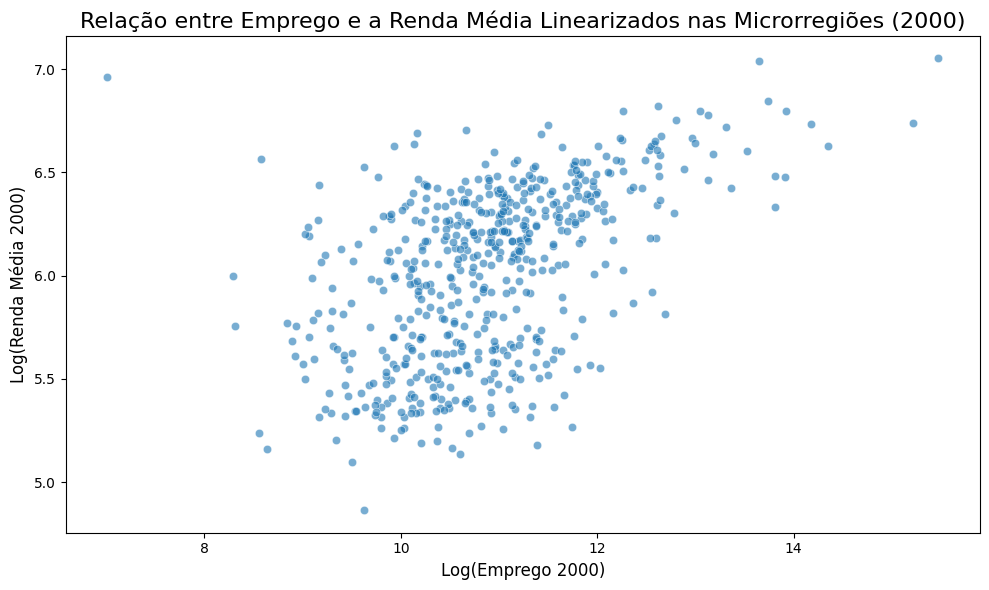

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_emprego2000', y='log_renda2000', data=df, alpha=0.6, edgecolor='w')
plt.title('Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)', fontsize=16)
plt.xlabel('Log(Emprego 2000)', fontsize=12)
plt.ylabel('Log(Renda Média 2000)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


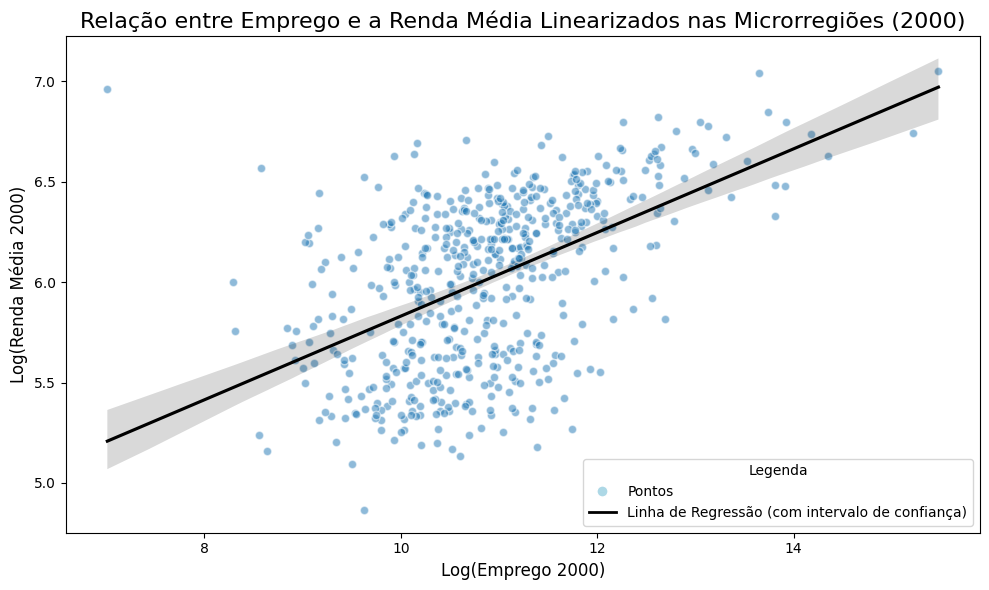

In [84]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
sns.regplot(x='log_emprego2000', y='log_renda2000', data=df, scatter_kws={'alpha':0.5, 'edgecolor':'w'}, line_kws={'color':'black'})
#sns.regplot(x='log_emprego2000', y='log_renda2000', data=df, scatter_kws={'alpha':0.6, 'edgecolor':'w'}, line_kws={'color':'black'}, ci=None )
plt.title('Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)', fontsize=16)
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão (com intervalo de confiança)')
]
plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.xlabel('Log(Emprego 2000)', fontsize=12)
plt.ylabel('Log(Renda Média 2000)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


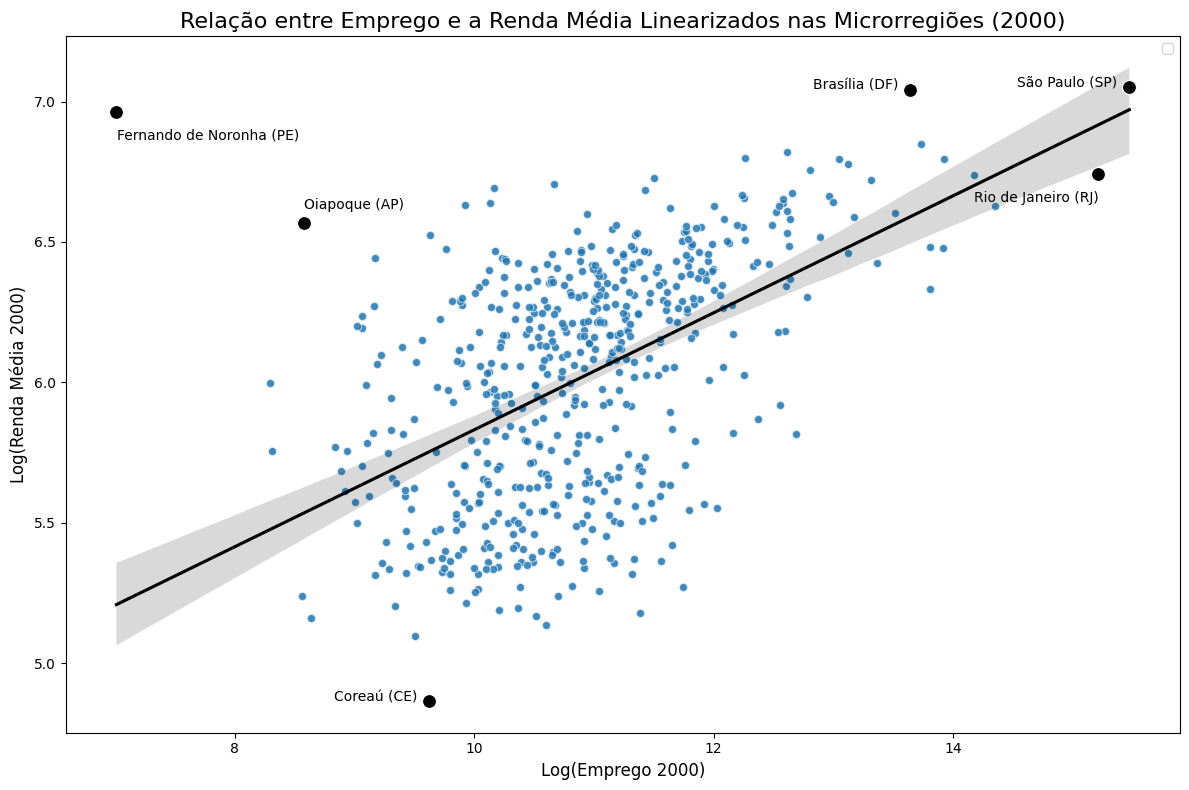

In [85]:
plt.figure(figsize=(12, 8))

# Lista de cidades para destacar
cidades_destacadas = [
    "Brasília (DF)", "Rio de Janeiro (RJ)", "São Paulo (SP)",
    "Fernando de Noronha (PE)", "Coreaú (CE)", "Oiapoque (AP)"
]

#Trendline:

sns.regplot(x='log_emprego2000', y='log_renda2000', data=df, scatter_kws={'alpha':0.8, 'edgecolor':'w'}, line_kws={'color':'black'})

# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df[~df['nome_micro'].isin(cidades_destacadas)],  # Excluir cidades destacadas
    alpha=0.3,
    edgecolor='w',
)

# Filtrar os dados das cidades destacadas
df_destacadas = df[df['nome_micro'].isin(cidades_destacadas)]

# Adicionar o scatterplot para os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df_destacadas,
    s=100,  # Tamanho maior para os pontos destacados
    color='black',
)

# Adicionar os nomes das cidades no gráfico
for _, row in df_destacadas.iterrows():
    x_offset, y_offset = 0, 0  # Definiremos ajustes específicos para cada cidade

    # Ajustar manualmente algumas cidades
    if row['nome_micro'] == "Fernando de Noronha (PE)":
        x_offset, y_offset = 0.001, -0.1  # Mover texto levemente para dentro
    elif row['nome_micro'] == "Oiapoque (AP)":
        x_offset, y_offset = 0.003, 0.05  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Rio de Janeiro (RJ)":
        x_offset, y_offset = 0.00, -0.1  # Pequeno ajuste para cima
    elif row['nome_micro'] == "São Paulo (SP)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Brasília (DF)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Coreaú (CE)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima


    plt.text(
        row['log_emprego2000'] + x_offset,
        row['log_renda2000'] + y_offset,
        row['nome_micro'],
        fontsize=10,
        color='black',
        ha='right' if x_offset <= 0 else 'left'  # Ajuste de alinhamento
    )

# Configurações do gráfico
plt.title('Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)', fontsize=16)
plt.xlabel('Log(Emprego 2000)', fontsize=12)
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão (com intervalo de confiança)')
]
plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.ylabel('Log(Renda Média 2000)', fontsize=12)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


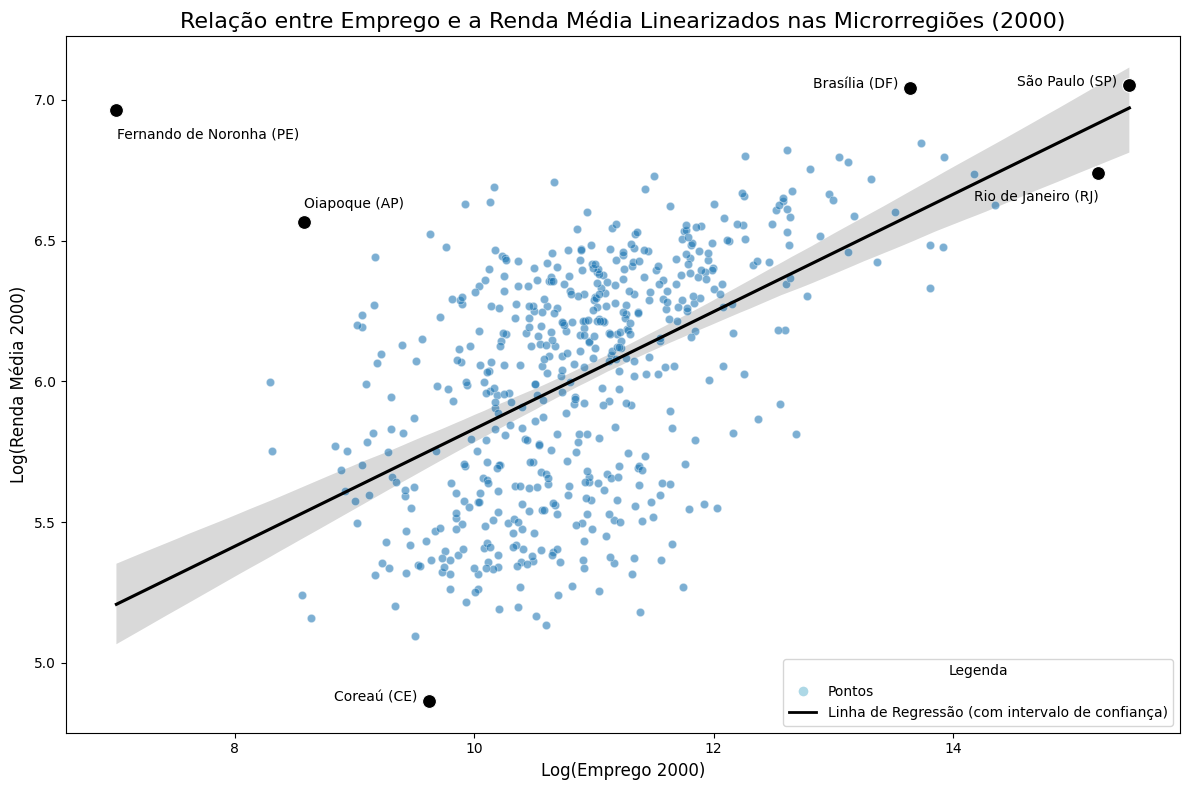

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))

# Lista de cidades para destacar
cidades_destacadas = [
    "Brasília (DF)", "Rio de Janeiro (RJ)", "São Paulo (SP)",
    "Fernando de Noronha (PE)", "Coreaú (CE)", "Oiapoque (AP)"
]

# Trendline
sns.regplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df,
    scatter_kws={'alpha': 0.3, 'edgecolor': 'w'},
    line_kws={'color': 'black'}
)





# Adicionar o scatterplot para os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df_destacadas,
    s=100,  # Tamanho maior para os pontos destacados
    color='black',
)

# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df[~df['nome_micro'].isin(cidades_destacadas)],  # Excluir cidades destacadas
    alpha=0.4,
    edgecolor='w',
)

# Filtrar os dados das cidades destacadas
df_destacadas = df[df['nome_micro'].isin(cidades_destacadas)]

# Adicionar os nomes das cidades no gráfico
for _, row in df_destacadas.iterrows():
    x_offset, y_offset = 0, 0  # Definiremos ajustes específicos para cada cidade

    # Ajustar manualmente algumas cidades
    if row['nome_micro'] == "Fernando de Noronha (PE)":
        x_offset, y_offset = 0.001, -0.1
    elif row['nome_micro'] == "Oiapoque (AP)":
        x_offset, y_offset = 0.003, 0.05
    elif row['nome_micro'] == "Rio de Janeiro (RJ)":
        x_offset, y_offset = 0.00, -0.1
    elif row['nome_micro'] == "São Paulo (SP)":
        x_offset, y_offset = -0.1, 0
    elif row['nome_micro'] == "Brasília (DF)":
        x_offset, y_offset = -0.1, 0
    elif row['nome_micro'] == "Coreaú (CE)":
        x_offset, y_offset = -0.1, 0

    plt.text(
        row['log_emprego2000'] + x_offset,
        row['log_renda2000'] + y_offset,
        row['nome_micro'],
        fontsize=10,
        color='black',
        ha='right' if x_offset <= 0 else 'left'  # Ajuste de alinhamento
    )

# Adicionar legenda personalizada
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão (com intervalo de confiança)')
]
plt.legend(handles=custom_legend, title='Legenda', loc='lower right')

# Configurações do gráfico
plt.title('Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)', fontsize=16)
plt.xlabel('Log(Emprego 2000)', fontsize=12)
plt.ylabel('Log(Renda Média 2000)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


In [87]:
#testamos outras regressões

## Polinomial

# Spline

## SVR

#rede neural ---> se vc remover Fernando de Noronha, fica próximo da LOWESS

#acabamos removendo da versão final porque não eram tão boas

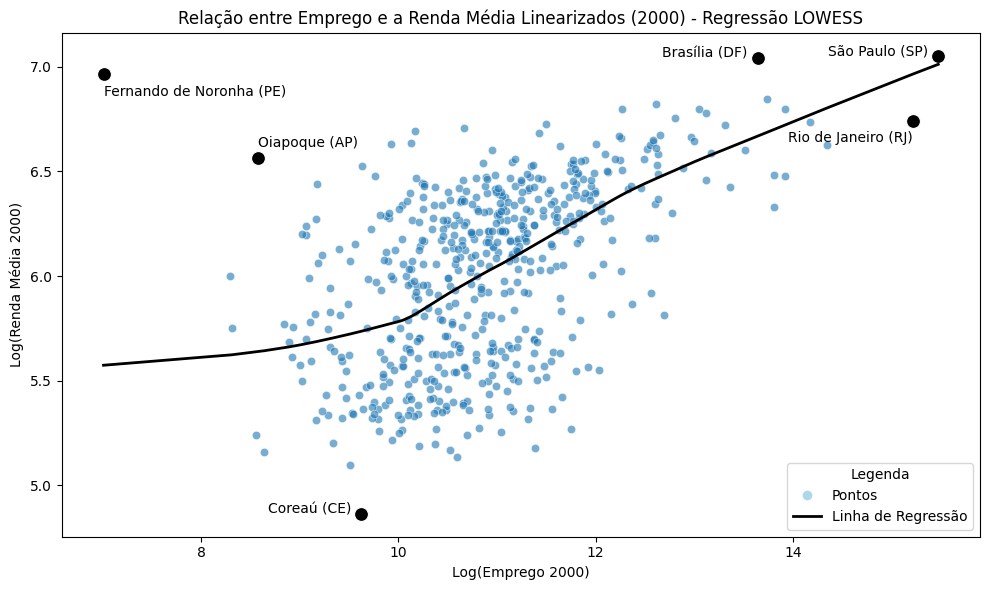

In [88]:
plt.figure(figsize=(10,6))
#sns.scatterplot(x='log_emprego2000', y='log_renda2000', data=df, alpha=0.6, edgecolor='w')
sns.regplot(x='log_emprego2000', y='log_renda2000', data=df, scatter=False, lowess=True, line_kws={'color': 'black', 'lw':2})
plt.title('Relação entre Emprego e a Renda Média Linearizados (2000) - Regressão LOWESS')
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão')
]





# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df[~df['nome_micro'].isin(cidades_destacadas)],  # Excluir cidades destacadas
    alpha=0.6,
    edgecolor='w',
)

# Filtrar os dados das cidades destacadas
df_destacadas = df[df['nome_micro'].isin(cidades_destacadas)]

# Adicionar os nomes das cidades no gráfico
for _, row in df_destacadas.iterrows():
    x_offset, y_offset = 0, 0  # Definiremos ajustes específicos para cada cidade

    # Ajustar manualmente algumas cidades
    if row['nome_micro'] == "Fernando de Noronha (PE)":
        x_offset, y_offset = 0.001, -0.1
    elif row['nome_micro'] == "Oiapoque (AP)":
        x_offset, y_offset = 0.003, 0.05
    elif row['nome_micro'] == "Rio de Janeiro (RJ)":
        x_offset, y_offset = 0.00, -0.1
    elif row['nome_micro'] == "São Paulo (SP)":
        x_offset, y_offset = -0.1, 0
    elif row['nome_micro'] == "Brasília (DF)":
        x_offset, y_offset = -0.1, 0
    elif row['nome_micro'] == "Coreaú (CE)":
        x_offset, y_offset = -0.1, 0

    plt.text(
        row['log_emprego2000'] + x_offset,
        row['log_renda2000'] + y_offset,
        row['nome_micro'],
        fontsize=10,
        color='black',
        ha='right' if x_offset <= 0 else 'left'  # Ajuste de alinhamento
    )
# Adicionar o scatterplot para os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df_destacadas,
    s=100,  # Tamanho maior para os pontos destacados
    color='black',
)


plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.xlabel('Log(Emprego 2000)')
plt.ylabel('Log(Renda Média 2000)')
plt.grid(False)
plt.tight_layout()
plt.show()


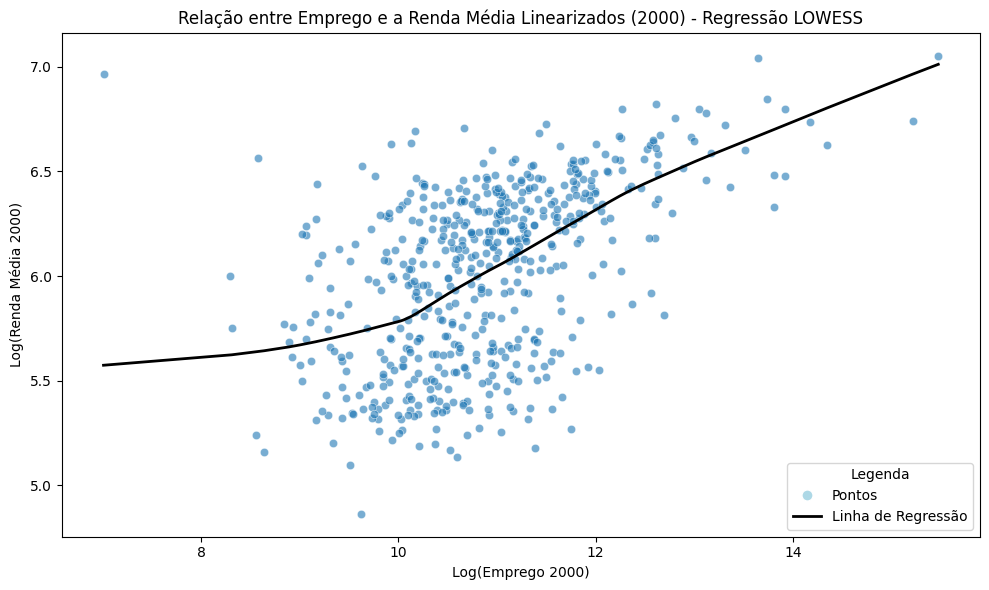

In [89]:
plt.figure(figsize=(10,6))
#sns.scatterplot(x='log_emprego2000', y='log_renda2000', data=df, alpha=0.6, edgecolor='w')
sns.regplot(x='log_emprego2000', y='log_renda2000', data=df, scatter=False, lowess=True, line_kws={'color': 'black', 'lw':2})
plt.title('Relação entre Emprego e a Renda Média Linearizados (2000) - Regressão LOWESS')
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão')
]





# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2000',
    y='log_renda2000',
    data=df,
    alpha=0.6,
    edgecolor='w',
)




plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.xlabel('Log(Emprego 2000)')
plt.ylabel('Log(Renda Média 2000)')
plt.grid(False)
plt.tight_layout()
plt.show()


p/ o ano 2010

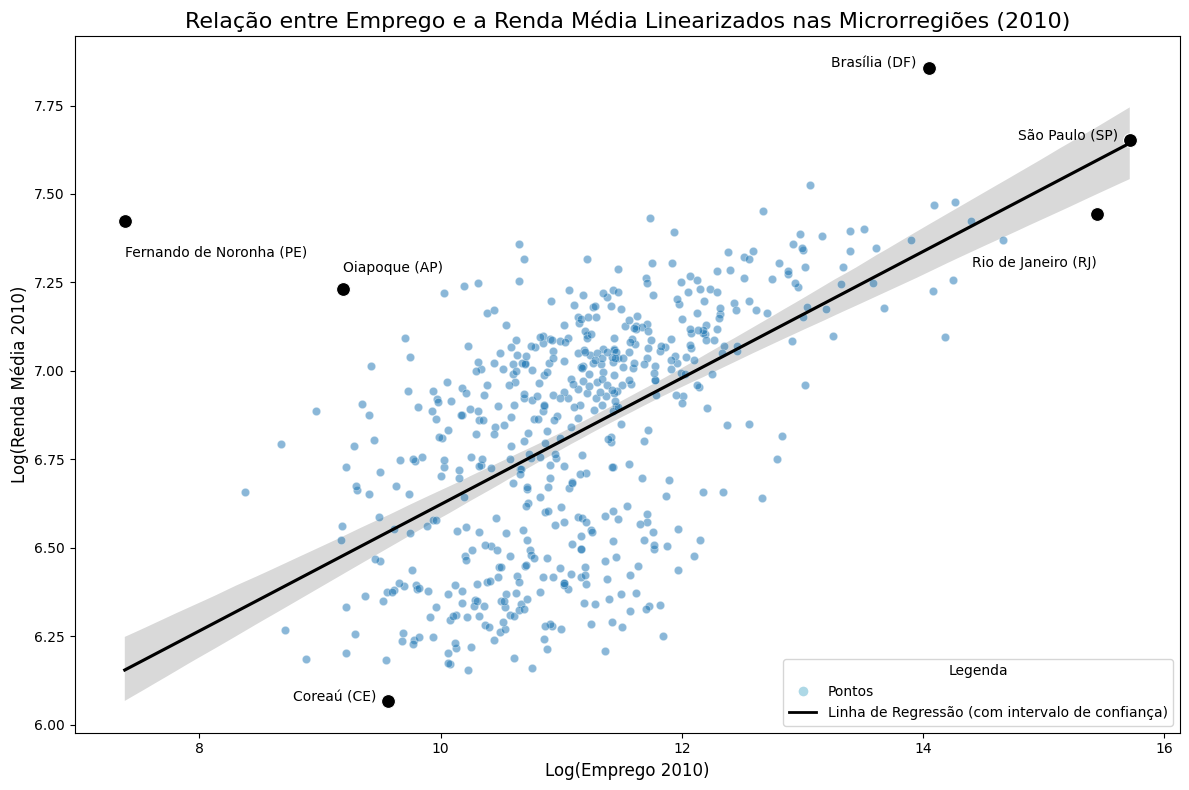

In [90]:
plt.figure(figsize=(12, 8))



# Trendline
sns.regplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df,
    scatter_kws={'alpha': 0.2, 'edgecolor': 'w'},
    line_kws={'color': 'black'}
)





# Adicionar o scatterplot para os pontos destacados
sns.scatterplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df_destacadas,
    s=100,  # Tamanho maior para os pontos destacados
    color='black',
)

# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df[~df['nome_micro'].isin(cidades_destacadas)],  # Excluir cidades destacadas
    alpha=0.4,
    edgecolor='w',
)

# Filtrar os dados das cidades destacadas
df_destacadas = df[df['nome_micro'].isin(cidades_destacadas)]

# Adicionar os nomes das cidades no gráfico
for _, row in df_destacadas.iterrows():
    x_offset, y_offset = 0, 0  # Definiremos ajustes específicos para cada cidade

    # Ajustar manualmente algumas cidades
    if row['nome_micro'] == "Fernando de Noronha (PE)":
        x_offset, y_offset = 0.001, -0.1  # Mover texto levemente para dentro
    elif row['nome_micro'] == "Oiapoque (AP)":
        x_offset, y_offset = 0.003, 0.05  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Rio de Janeiro (RJ)":
        x_offset, y_offset = -0.001, -0.15  # Pequeno ajuste para cima
    elif row['nome_micro'] == "São Paulo (SP)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Brasília (DF)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Coreaú (CE)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima

    plt.text(
        row['log_emprego2010'] + x_offset,
        row['log_renda2010'] + y_offset,
        row['nome_micro'],
        fontsize=10,
        color='black',
        ha='right' if x_offset <= 0 else 'left'  # Ajuste de alinhamento
    )

# Adicionar legenda personalizada
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão (com intervalo de confiança)')
]
plt.legend(handles=custom_legend, title='Legenda', loc='lower right')

# Configurações do gráfico
plt.title('Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2010)', fontsize=16)
plt.xlabel('Log(Emprego 2010)', fontsize=12)
plt.ylabel('Log(Renda Média 2010)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


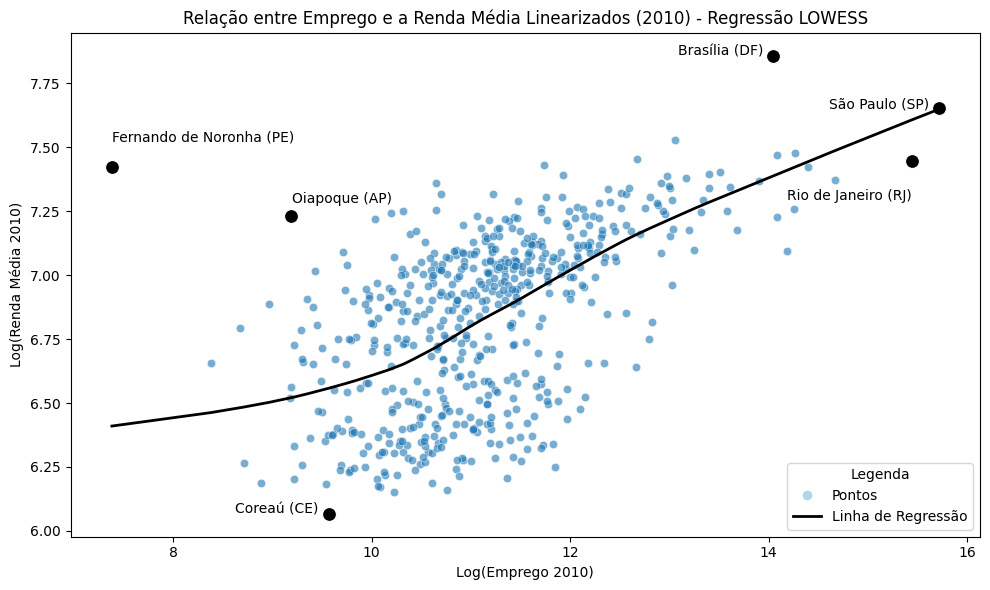

In [91]:
plt.figure(figsize=(10,6))
#sns.scatterplot(x='log_emprego2000', y='log_renda2000', data=df, alpha=0.6, edgecolor='w')
sns.regplot(x='log_emprego2010', y='log_renda2010', data=df, scatter=False, lowess=True, line_kws={'color': 'black', 'lw':2})
plt.title('Relação entre Emprego e a Renda Média Linearizados (2010) - Regressão LOWESS')
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão')
]





# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df[~df['nome_micro'].isin(cidades_destacadas)],  # Excluir cidades destacadas
    alpha=0.6,
    edgecolor='w',
)

# Filtrar os dados das cidades destacadas
df_destacadas = df[df['nome_micro'].isin(cidades_destacadas)]

# Adicionar os nomes das cidades no gráfico
for _, row in df_destacadas.iterrows():
    x_offset, y_offset = 0, 0  # Definiremos ajustes específicos para cada cidade

    # Ajustar manualmente algumas cidades
    if row['nome_micro'] == "Fernando de Noronha (PE)":
        x_offset, y_offset = 0.001, 0.1  # Mover texto levemente para dentro
    elif row['nome_micro'] == "Oiapoque (AP)":
        x_offset, y_offset = 0.003, 0.05  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Rio de Janeiro (RJ)":
        x_offset, y_offset = -0.001, -0.15  # Pequeno ajuste para cima
    elif row['nome_micro'] == "São Paulo (SP)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Brasília (DF)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima
    elif row['nome_micro'] == "Coreaú (CE)":
        x_offset, y_offset = -0.1, 0  # Pequeno ajuste para cima

    plt.text(
        row['log_emprego2010'] + x_offset,
        row['log_renda2010'] + y_offset,
        row['nome_micro'],
        fontsize=10,
        color='black',
        ha='right' if x_offset <= 0 else 'left'  # Ajuste de alinhamento
    )

# Adicionar o scatterplot para os pontos destacados
sns.scatterplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df_destacadas,
    s=100,  # Tamanho maior para os pontos destacados
    color='black',
)


plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.xlabel('Log(Emprego 2010)')
plt.ylabel('Log(Renda Média 2010)')
plt.grid(False)
plt.tight_layout()
plt.show()

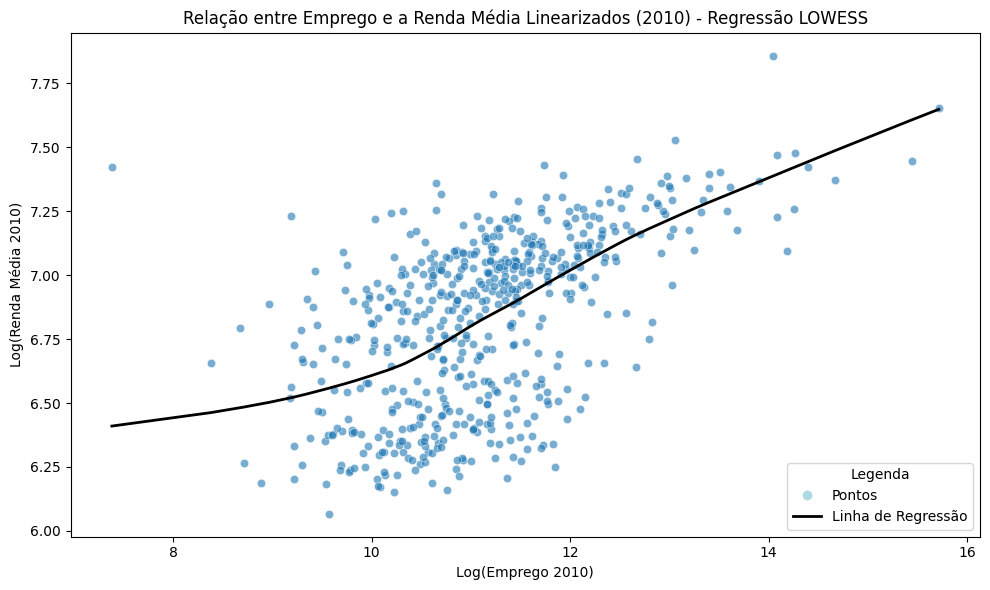

In [92]:
plt.figure(figsize=(10,6))
#sns.scatterplot(x='log_emprego2000', y='log_renda2000', data=df, alpha=0.6, edgecolor='w')
sns.regplot(x='log_emprego2010', y='log_renda2010', data=df, scatter=False, lowess=True, line_kws={'color': 'black', 'lw':2})
plt.title('Relação entre Emprego e a Renda Média Linearizados (2010) - Regressão LOWESS')
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Pontos'),
    Line2D([0], [0], color='black', lw=2, label='Linha de Regressão')
]





# Criar o scatterplot sem os pontos destacados
sns.scatterplot(
    x='log_emprego2010',
    y='log_renda2010',
    data=df,  # Excluir cidades destacadas
    alpha=0.6,
    edgecolor='w',
)




plt.legend(handles=custom_legend, title='Legenda', loc='lower right')
plt.xlabel('Log(Emprego 2010)')
plt.ylabel('Log(Renda Média 2010)')
plt.grid(False)
plt.tight_layout()
plt.show()

# Plotly: Gráfico Interativo p/ questão 1

In [93]:
!pip install plotly pandas
!pip install plotly pandas statsmodels


In [94]:
import pandas as pd
import numpy as np
import plotly.express as px


In [95]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [96]:
# Ajustar o modelo LWOESS
lowess = sm.nonparametric.lowess
# frac controla o grau de suavização. Ajuste conforme necessário (ex: 0.3)
z = lowess(df['log_renda2000'], df['log_emprego2000'], frac=0.6)

# Convertendo o resultado para um DataFrame para facilitar a manipulação
lowess_df = pd.DataFrame(z, columns=['log_emprego2000', 'log_renda2000'])

# Criar a regressão linear
model = LinearRegression()
model.fit(df[['log_emprego2000']], df['log_renda2000'])
df['linear_trend'] = model.predict(df[['log_emprego2000']])

# Função para formatar números com espaços a cada três dígitos
def format_number(x):
    return f"{int(x):,}".replace(",", " ")

# Aplicar a função nas colunas 'emprego2000' e 'renda2000'
df['formatted_emprego2000'] = df['emprego2000'].apply(format_number)
df['formatted_renda2000'] = df['renda2000'].apply(format_number)
df['formatted_emprego2010'] = df['emprego2010'].apply(format_number)
df['formatted_renda2010'] = df['renda2010'].apply(format_number)

# Verificar as novas colunas formatadas
print(df[['emprego2010', 'formatted_emprego2010', 'renda2010', 'formatted_renda2010']].head())

   emprego2010 formatted_emprego2010  renda2010 formatted_renda2010
0       238960               238 960    1535.09               1 535
1        26231                26 231     968.71                 968
2        72008                72 008    1111.23               1 111
3       121458               121 458    1138.42               1 138
4        25998                25 998     969.38                 969


In [97]:
# Criar o scatterplot interativo
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2000'],
        y=df['log_renda2000'],
        mode='markers',
        marker=dict(
            size=8,
            color='rgba(31, 119, 180, 0.3)',  # Cor azul com transparência
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        text=df['nome_micro'],  # Exibe o nome da microrregião no hover
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            'Renda 2000: %{customdata[1]}<br>' +
            'Log(Emprego 2000): %{x:.2f}<br>' +
            'Log(Renda Média 2000): %{y:.2f}<br>' +
            '<extra></extra>'  # Remove a informação adicional padrão
        ),
        customdata=np.stack((df['formatted_emprego2000'], df['formatted_renda2000']), axis=-1),
        name='Cidades'
    )
)

# Adicionar a linha de tendência LOWESS
fig.add_trace(
    go.Scatter(
        x=lowess_df['log_emprego2000'],
        y=lowess_df['log_renda2000'],
        mode='lines',
        name='Regressão LOWESS',
        line=dict(color='black', width=5),
        hoverinfo='skip'  # Ignora informações ao passar o mouse sobre a linha
    )
)

# Adicionar a linha de tendência por regressão linear
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2000'],
        y=df['linear_trend'],
        mode='lines',
        name='Regressão Linear',
        line=dict(color='#8B0000', width=5),
        hoverinfo='skip'
    )
)


# Atualizar o layout do gráfico
fig.update_layout(
    title='Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2000)',
    xaxis_title='Log(Emprego 2000)',
    yaxis_title='Log(Renda Média 2000)',
    template='plotly_white',
    showlegend=True,  # Remove a legenda
    hovermode='closest',
    width=1200,  # Ajusta a largura do gráfico (reduzido)
    #height=600  # Mantém uma altura equilibrada
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    legend=dict(
      title='Linhas de Tendência',
      itemsizing='constant'
    )
)
# Exibir o gráfico
fig.show()


In [98]:
fig.write_html('grafico_interativo2000.html')


## 2010

In [99]:
# Ajustar o modelo LWOESS
lowess = sm.nonparametric.lowess
# frac controla o grau de suavização. Ajuste conforme necessário (ex: 0.3)
z = lowess(df['log_renda2010'], df['log_emprego2010'], frac=0.6)

# Convertendo o resultado para um DataFrame para facilitar a manipulação
lowess_df10 = pd.DataFrame(z, columns=['log_emprego2010', 'log_renda2010'])

# Criar a regressão linear
model = LinearRegression()
model.fit(df[['log_emprego2010']], df['log_renda2010'])
df['linear_trend'] = model.predict(df[['log_emprego2010']])

In [100]:
# Criar o scatterplot interativo
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2010'],
        y=df['log_renda2010'],
        mode='markers',
        marker=dict(
            size=8,
            color='rgba(31, 119, 180, 0.3)',  # Cor azul com transparência
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        text=df['nome_micro'],  # Exibe o nome da microrregião no hover
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            'Renda 2000: %{customdata[1]}<br>' +
            'Log(Emprego 2000): %{x:.2f}<br>' +
            'Log(Renda Média 2000): %{y:.2f}<br>' +
            '<extra></extra>'  # Remove a informação adicional padrão
        ),
        customdata=np.stack((df['formatted_emprego2010'], df['formatted_renda2010']), axis=-1),
        name='Cidades'
    )
)

# Adicionar a linha de tendência LOWESS
fig.add_trace(
    go.Scatter(
        x=lowess_df10['log_emprego2010'],
        y=lowess_df10['log_renda2010'],
        mode='lines',
        name='Regressão LOWESS',
        line=dict(color='black', width=5),
        hoverinfo='skip'  # Ignora informações ao passar o mouse sobre a linha
    )
)

# Adicionar a linha de tendência por regressão linear
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2010'],
        y=df['linear_trend'],
        mode='lines',
        name='Regressão Linear',
        line=dict(color='#8B0000', width=5),
        hoverinfo='skip'
    )
)


# Atualizar o layout do gráfico
fig.update_layout(
    title='Relação entre Emprego e a Renda Média Linearizados nas Microrregiões (2010)',
    xaxis_title='Log(Emprego 2010)',
    yaxis_title='Log(Renda Média 2010)',
    template='plotly_white',
    showlegend=True,  # Remove a legenda
    hovermode='closest',
    width=1200,  # Ajusta a largura do gráfico (reduzido)
    #height=600  # Mantém uma altura equilibrada
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    legend=dict(
      title='Linhas de Tendência',
      itemsizing='constant'
    )
)
# Exibir o gráfico
fig.show()


In [101]:
fig.write_html('grafico_interativo2010.html')

Os dois gráficos estão muito parecidos, com um leve aumento de nível (maior população, mais renda em geral) e uma aparente maior proximidade da linha de tendência e a população

#Questão 3: correlação entre população e renda média da região




In [102]:
import pandas as pd

# Calculando a correlação para o ano 2000
correlacao_2000 = df['log_emprego2000'].corr(df['log_renda2000'])

# Calculando a correlação para o ano 2010
correlacao_2010 = df['log_emprego2010'].corr(df['log_renda2010'])

# Exibindo os resultados
print(f"Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2000: {correlacao_2000:.2f}")
print(f"Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2010: {correlacao_2010:.2f}")


Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2000: 0.51
Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2010: 0.56


Interpretação:

Ano 2000:
Valor: 0.51
Interpretação: Existe uma correlação forte positiva entre o logaritmo do emprego e o logaritmo da renda média nas microrregiões em 2000. Isso indica que microrregiões com um maior número de empregos tendem a apresentar rendas médias mais elevadas.

Ano 2010:
Valor: 0.55
Interpretação: A correlação forte positiva aumentou ligeiramente para 0.56 em 2010. Isso sugere que, ao longo da década, a relação entre o tamanho do mercado de trabalho e a renda média se intensificou nas microrregiões analisadas.

Os resultados indicam que há uma relação positiva e robusta entre o tamanho do mercado de trabalho (emprego) e a renda média nas microrregiões tanto em 2000 quanto em 2010. A elevação do coeficiente de correlação de 0.51 para 0.56 demonstra um aumento das forças de aglomeração, e comprava que os dados se aproximaram da trendline no segundo gráfico

# Questão 4: correlação entre mudança na pop e na renda média


In [103]:
import pandas as pd
import numpy as np



# Criar as colunas de diferença para log_emprego e log_renda
df['diff_log_emprego'] = df['log_emprego2010'] - df['log_emprego2000']
df['diff_log_renda'] = df['log_renda2010'] - df['log_renda2000']

# Verificar as novas colunas
print(df[['log_emprego2000', 'log_emprego2010', 'diff_log_emprego',
          'log_renda2000', 'log_renda2010', 'diff_log_renda']].head())


   log_emprego2000  log_emprego2010  diff_log_emprego  log_renda2000  \
0        11.896390        12.384051          0.487661       6.552351   
1         9.900483        10.174697          0.274214       6.275026   
2        10.791996        11.184533          0.392537       6.375519   
3        11.575055        11.707324          0.132269       6.293031   
4        10.050182        10.165775          0.115593       6.059684   

   log_renda2010  diff_log_renda  
0       7.336344        0.783993  
1       6.875965        0.600940  
2       7.013223        0.637704  
3       7.037397        0.744366  
4       6.876657        0.816973  


In [104]:
# Criar a regressão linear
model = LinearRegression()
model.fit(df[['diff_log_renda']], df['diff_log_emprego'])


df['regressão_linear_diff'] = model.predict(df[['diff_log_renda']])

In [105]:
# Ajustar o modelo LOWESS para as diferenças
lowess = sm.nonparametric.lowess
z = lowess(df['diff_log_renda'], df['diff_log_emprego'], frac=0.3)
lowess_df = pd.DataFrame(z, columns=['diff_log_emprego', 'diff_log_renda'])

# Ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(df[['diff_log_emprego']], df['diff_log_renda'])
df['linear_trend'] = model.predict(df[['diff_log_emprego']])

# Criar o scatterplot interativo
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['diff_log_emprego'],
        y=df['diff_log_renda'],
        mode='markers',
        name='Cidades',  # Nome para aparecer na legenda
        marker=dict(
            size=8,
            color='rgba(100, 200, 150, 0.5)',  # Cor azul com transparência
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        text=df['nome_micro'],
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            'Emprego 2010: %{customdata[1]}<br>' +
            'Renda 2000: %{customdata[2]}<br>' +
            'Renda 2010: %{customdata[3]}<br>' +
            'Diferença Log(Emprego): %{x:.2f}<br>' +
            'Diferença Log(Renda): %{y:.2f}<br>' +
            '<extra></extra>'
        ),
        customdata=np.stack((df['formatted_emprego2000'],
                             df['formatted_emprego2010'],
                             df['formatted_renda2000'],
                             df['formatted_renda2010']), axis=-1)
    )
)

# Adicionar a linha de tendência LOWESS
fig.add_trace(
    go.Scatter(
        x=lowess_df['diff_log_emprego'],
        y=lowess_df['diff_log_renda'],
        mode='lines',
        name='Linha de Tendência (LOWESS)',  # Nome para aparecer na legenda
        line=dict(color='black', width=4),
        hoverinfo='skip'  # Ignora informações ao passar o mouse sobre a linha
    )
)

# Adicionar a linha de tendência por regressão linear
fig.add_trace(
    go.Scatter(
        x=df['diff_log_emprego'],
        y=df['linear_trend'],
        mode='lines',
        name='Linha de Tendência (Regressão Linear)',  # Nome para aparecer na legenda
        line=dict(color='#8B0000', width=4),
        hoverinfo='skip'
    )
)

# Atualizar o layout do gráfico
fig.update_layout(
    title='Relação entre Diferenças dos Logaritmos de Emprego e Renda (2010 - 2000)',
    xaxis_title='Diferença Log(Emprego 2010 - Emprego 2000)',
    yaxis_title='Diferença Log(Renda Média 2010 - Renda Média 2000)',
    template='plotly_white',
    showlegend=True,  # Mostrar a legenda
    hovermode='closest',
    width=1200,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    legend=dict(
        title='Elementos do Gráfico',
        itemsizing='constant'
    )
)

# Exibir o gráfico
fig.show()

In [106]:
fig.write_html('grafico_interativo_diferenças.html')

In [107]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import linregress
import pandas as pd

# Calcular os coeficientes da regressão linear
slope, intercept, r_value, p_value, std_err = linregress(
    df['diff_log_emprego'], df['diff_log_renda']
)

# Gerar a linha de regressão
x_range = np.linspace(df['diff_log_emprego'].min(), df['diff_log_emprego'].max(), 100)
y_range = slope * x_range + intercept

# Criar o scatterplot interativo
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['diff_log_emprego'],
        y=df['diff_log_renda'],
        mode='markers',
        marker=dict(
            size=8,
            color='rgba(100, 200, 150, 0.5)',  # Cor verde com transparência
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        text=df['nome_micro'],
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            'Emprego 2010: %{customdata[1]}<br>' +
            'Renda 2000: %{customdata[2]}<br>' +
            'Renda 2010: %{customdata[3]}<br>' +
            'Diferença Log(Emprego): %{x:.2f}<br>' +
            'Diferença Log(Renda): %{y:.2f}<br>' +
            '<extra></extra>'  # Remove a informação adicional padrão
        ),
        customdata=np.stack((df['formatted_emprego2000'],
                             df['formatted_emprego2010'],
                             df['formatted_renda2000'],
                             df['formatted_renda2010']), axis=-1),
        name='Microregiões'  # Nome da série para a legenda
    )
)

# Adicionar a linha de regressão linear
fig.add_trace(
    go.Scatter(
        x=x_range,
        y=y_range,
        mode='lines',
        name='Linha de Regressão Linear',  # Nome da linha na legenda
        line=dict(color='black', width=4),  # Cor vermelha para destacar
        hoverinfo='skip'  # Ignora informações ao passar o mouse sobre a linha
    )
)

# Atualizar o layout do gráfico
fig.update_layout(
    title='Relação entre Diferenças dos Logaritmos de Emprego e Renda (2010 - 2000)',
    xaxis_title='Diferença Log(Emprego 2010 - Emprego 2000)',
    yaxis_title='Diferença Log(Renda Média 2010 - Renda Média 2000)',
    template='plotly_white',
    showlegend=True,  # Ativa a legenda
    hovermode='closest',
    width=1200,  # Ajusta a largura do gráfico
    xaxis=dict(
        showgrid=False,
        zeroline=False  # Remove a linha no ponto zero do eixo x
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False  # Remove a linha no ponto zero do eixo y
    ),
)

# Exibir o gráfico
fig.show()

In [108]:
# Calcular a correlação entre as diferenças
correlacao_diferencas = df['diff_log_emprego'].corr(df['diff_log_renda'])

# Exibir o resultado
print(f"Coeficiente de Correlação entre Diferença Log(Emprego) e Diferença Log(Renda): {correlacao_diferencas:.2f}")


Coeficiente de Correlação entre Diferença Log(Emprego) e Diferença Log(Renda): -0.31


Essa correlação negativa significa que um aumento na população entre 2000 e 2010 se correlacionou com uma queda na renda das cidades. Isso contradiz a proposta de que uma maior população estaria relacionado com maior renda, devido aos ganhos de aglomeração e, ademais, contradiz o que encontramos na questão anterior, onde a correlação entre população e renda foi ainda maior que em 2010.

Na próxima questão, separaremos os grupos em cidades com maior e menor população, sendo o cutoff para o grupo de maior população aproiximadamente 350 mil empregos em 2000. Fazendo a correlação entre as diferenças de emprego e renda entre 2000 e 2010 nas cidades que pertenciam ao grupo menor emprego em 2000, a correlação se mantem em -0.31. Porém, fazendo essa correlação nmas cidades do grupo maior, ela salta para 0.42.

Os dados indicam que os ganhos de aglomeração existem, porém, eles só acontecem em cidades relativamente grandes. Nas cidades de menor porte, o aumento da população pode deprimir o PIB per capita.

22 das microregiões passam de nosso cutoff. Enquanto 536 não passam. Portanto, faz sentido que a correlação encontrada seja igual a correlação do grupo menor.

# 5: Dividindo em grupos, achando correlações em apenas um.

## Base

In [109]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind



In [110]:
# Descobrindo alguns valores importantes

In [111]:
media_emprego2000 = df['emprego2000'].mean()
media_emprego2000

108635.0376344086

In [112]:
# Calculando o desvio padrão da coluna 'emprego2000'
desvio_padrao = df['log_emprego2000'].std()
media_log_emprego2000 = df['log_emprego2000'].mean()



# Exibindo o resultado
print(f"média log emprego 2000 é ", {media_log_emprego2000})
print(f"O desvio padrão dos dados na coluna 'emprego2000' é: {desvio_padrao}")
print("1 desvio padrão de distancia está em", media_log_emprego2000 + 2*desvio_padrao)


média log emprego 2000 é  {10.875964515972248}
O desvio padrão dos dados na coluna 'emprego2000' é: 1.0269693146237011
1 desvio padrão de distancia está em 12.929903145219651


In [113]:
log_media_emprego2000 = np.log(media_emprego2000)
log_media_emprego2000

11.59574926459915

In [114]:
#As linhas comentadas abaixo precisam do codigo4de baixo delas

In [115]:
#mediana df_agg -> log emprego 200 = 10.845

In [116]:
#df_agg['log_emprego2000'].median()


In [117]:
#df_agg2['log_emprego2010'].median()

In [118]:
#terceiro_quartil = df_agg['log_emprego2000'].quantile(0.967)
#print(terceiro_quartil)

In [119]:
#terceiro_quartil = df_agg2['log_emprego2010'].quantile(0.75)
#print(terceiro_quartil)

In [120]:
#Cria uma df agregado, faz regressões LOWESS, limpa alguns dados que deram erro anteriormente

import pandas as pd
import numpy as np
import statsmodels.api as sm

#df para testes, que acabou sendo usado nas linha abaixo
#df_clean = df.dropna(subset=['log_emprego2000', 'log_renda2000']).copy()

# Aplicar LOWESS com frac=0.5 para 2000 e criar dataframe
z_lowess_2000 = sm.nonparametric.lowess(
    endog=df['log_renda2000'],
    exog=df['log_emprego2000'],
    frac=0.5
)
lowess_df_2000 = pd.DataFrame(z_lowess_2000, columns=['log_emprego2000', 'trend_log_renda2000'])

# Mesmo p/ 2010

z_lowess_2010 = sm.nonparametric.lowess(
    endog=df['log_renda2010'],
    exog=df['log_emprego2010'],
    frac=0.5
)
lowess_df_2010 = pd.DataFrame(z_lowess_2010, columns=['log_emprego2010', 'trend_log_renda2010'])






In [121]:
#Fazendo a regressão linear novamente
model = LinearRegression()
model.fit(df[['log_emprego2010']], df["log_renda2010"])
df['regressão_linear_10'] = model.predict(df[['log_emprego2010']])

model.fit(df[['log_emprego2000']], df["log_renda2000"])
df['regressão_linear_2k'] = model.predict(df[['log_emprego2000']])

In [122]:

# Ordenar o DataFrame Original por 'log_emprego2000'
df_sorted = df.sort_values('log_emprego2000').reset_index(drop=True)

# Merge com o DataFrame LOESS Agregado para 2000
df_sorted = df_sorted.merge(lowess_df_2000, on='log_emprego2000', how='left')
df_sorted = df_sorted.merge(lowess_df_2010, on='log_emprego2010', how='left')

In [123]:


# Calcular os resíduos para 2000 ----> passo para metrica não mais utilizada
df_sorted['residual_renda2000'] = df_sorted['log_renda2000'] - df_sorted['trend_log_renda2000']

print(df_sorted[['log_emprego2000', 'log_renda2000', 'trend_log_renda2000', 'residual_renda2000']].head())

df_sorted['residual_renda2010'] = df_sorted['log_renda2010'] - df_sorted['trend_log_renda2010']
#mesmos passos para 2010

df_sorted10 = df_sorted.sort_values('log_emprego2010').reset_index(drop=True)
df_sorted10 = df_sorted.merge(lowess_df_2010, on='log_emprego2010', how='left')
df_sorted10['residual_renda2010'] = df_sorted['log_renda2010'] - df_sorted['trend_log_renda2010']

# Verificar os primeiros registros com os resíduos de 2010
print(df_sorted[['log_emprego2010', 'log_renda2010', 'trend_log_renda2010', 'residual_renda2010']].head())

   log_emprego2000  log_renda2000  trend_log_renda2000  residual_renda2000
0         7.011214       6.963493             5.877003            1.086490
1         8.290794       5.998937             5.728667            0.270270
2         8.312135       5.754381             5.726516            0.027865
3         8.557951       5.239787             5.704018           -0.464231
4         8.576405       6.566096             5.702625            0.863471
   log_emprego2010  log_renda2010  trend_log_renda2010  residual_renda2010
0         7.380879       7.422852             6.601980            0.820871
1         8.677099       6.793287             6.540662            0.252624
2         8.379309       6.657061             6.552003            0.105058
3         8.710125       6.266916             6.539524           -0.272608
4         9.190444       7.230614             6.539202            0.691411


## Residuos (depreciado, mas ficou prox do resultado final)

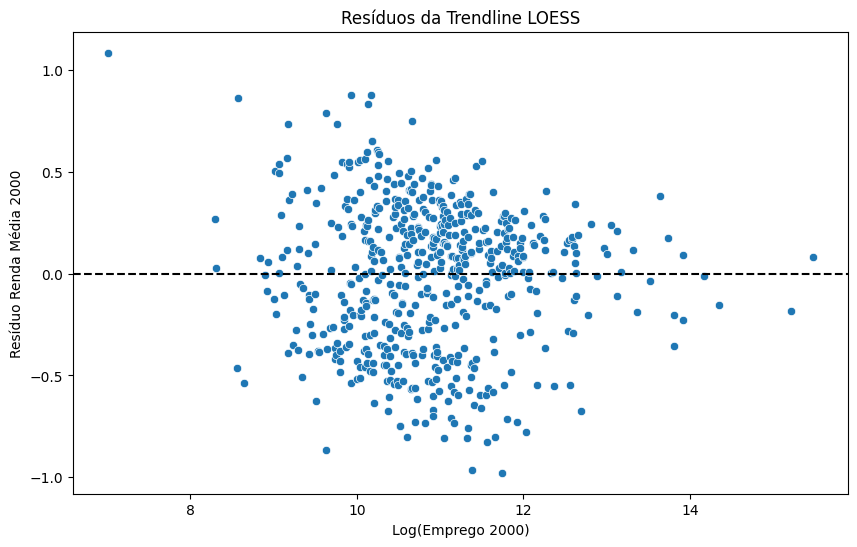

In [124]:
# Plotar os resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_emprego2000', y='residual_renda2000', data=df_sorted)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Resíduos da Trendline LOESS')
plt.xlabel('Log(Emprego 2000)')
plt.ylabel('Resíduo Renda Média 2000')
plt.show()


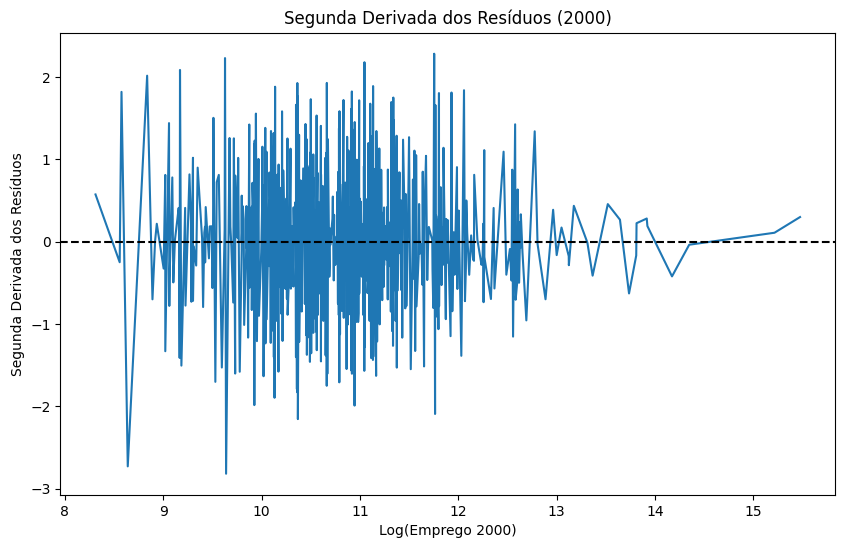

In [125]:
# Calcular a segunda derivada dos resíduos
df_sorted['residual_diff2000'] = df_sorted['residual_renda2000'].diff()
df_sorted['residual_diff2_2000'] = df_sorted['residual_diff2000'].diff()

# Plotar a segunda derivada
plt.figure(figsize=(10, 6))
sns.lineplot(x='log_emprego2000', y='residual_diff2_2000', data=df_sorted)
plt.title('Segunda Derivada dos Resíduos (2000)')
plt.xlabel('Log(Emprego 2000)')
plt.ylabel('Segunda Derivada dos Resíduos')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()



In [126]:
# A segunda derivada dos resíduos foi uma tecnica que utilizamos para melhor entender quando os resíduos se aproximam da trendline lowess. Acabamos decidindo não utilizar este parâmetro explicitamente

Para determinar um ponto de corte eficaz para segmentar as microrregiões com base em log_emprego2000, utilizamos a análise da segunda derivada dos resíduos provenientes de uma regressão LOWESS. Inicialmente, aplicamos a regressão LOWESS para modelar a relação entre log_emprego2000 e log_renda2000. Em seguida, calculamos os resíduos, que são as diferenças entre os valores observados e os valores previstos pela LOWESS.

Ao ordenar os dados por log_emprego2000 e calcular a segunda derivada desses resíduos, conseguimos identificar o ponto onde a variação na taxa de mudança dos resíduos se estabiliza, ou seja, quando a segunda derivada se aproxima de zero. Esse ponto de estabilização sugere uma transição na relação entre emprego e renda, indicando uma divisão natural nos dados. No nosso caso, observamos que essa estabilização ocorre próximo a log_emprego2000 = 12.8. Portanto, escolhemos 12.8 como ponto de corte para separar as microrregiões em grupos "Maior" e "Menor".

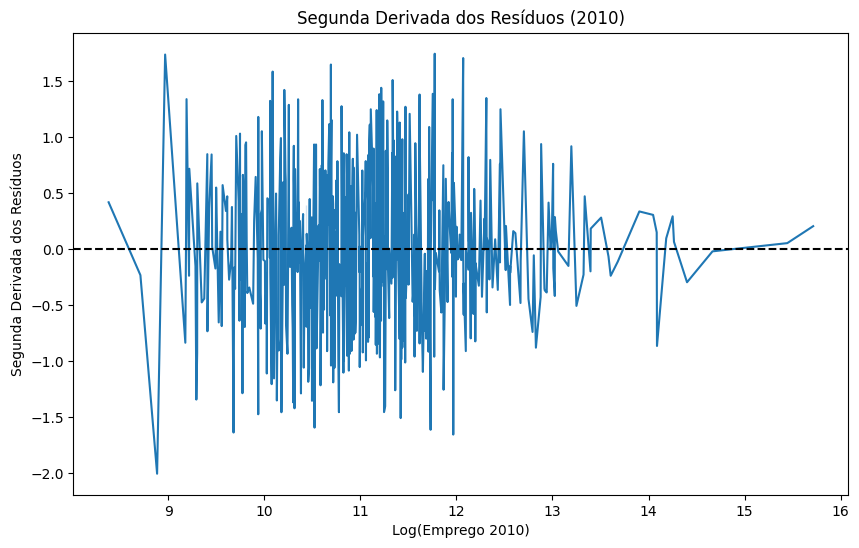

In [127]:
# Calcular a segunda derivada dos resíduos
df_sorted['residual_diff2010'] = df_sorted['residual_renda2010'].diff()
df_sorted['residual_diff2_2010'] = df_sorted['residual_diff2010'].diff()

# Plotar a segunda derivada
plt.figure(figsize=(10, 6))
sns.lineplot(x='log_emprego2010', y='residual_diff2_2010', data=df_sorted)
plt.title('Segunda Derivada dos Resíduos (2010)')
plt.xlabel('Log(Emprego 2010)')
plt.ylabel('Segunda Derivada dos Resíduos')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#no caso de 2010 eu colocaria o cutoff em 13.1

In [128]:
# Definir o cutoff em 13, conforme a observação visual
cutoff_log_emprego10 = 13
cutoff_log_emprego2k = 12.8
# Definir os grupos
df['grupo_emprego10'] = np.where(df['log_emprego2010'] > cutoff_log_emprego10, 'Maior', 'Menor')
df['grupo_emprego2k'] = np.where(df['log_emprego2000'] > cutoff_log_emprego2k, 'Maior', 'Menor')

# Verificar a distribuição dos grupos
print(df['grupo_emprego10'].value_counts())
print(df['grupo_emprego2k'].value_counts())


grupo_emprego10
Menor    530
Maior     28
Name: count, dtype: int64
grupo_emprego2k
Menor    537
Maior     21
Name: count, dtype: int64


## Correlação mais forte

###Correlação e cutoffs

In [129]:
# Definir os cutoffs
cutoff_log_emprego10 = 12.85
cutoff_log_emprego2k = 12.7

#valores foram escolhidos baseados na máxima correlação entre as diferenças de emprego e salários
#maximizando os efeitos de aglomeração

# Definir os grupos
df['grupo_emprego10'] = np.where(df['log_emprego2010'] > cutoff_log_emprego10, 'Maior', 'Menor')
df['grupo_emprego2k'] = np.where(df['log_emprego2000'] > cutoff_log_emprego2k, 'Maior', 'Menor')

# Calcular correlações para cada grupo
correlacoes = {}

for grupo in ['Maior', 'Menor']:
    for col_grupo in ['grupo_emprego10', 'grupo_emprego2k']:
        grupo_df = df[df[col_grupo] == grupo]
        correlacao = grupo_df['diff_log_emprego'].corr(grupo_df['diff_log_renda'])
        correlacoes[f'{col_grupo}_{grupo}'] = correlacao

# Exibir os resultados
correlacoes_df = pd.DataFrame(list(correlacoes.items()), columns=['Grupo', 'Correlação'])
correlacoes_df

,Grupo,Correlação
0,grupo_emprego10_Maior,0.315709
1,grupo_emprego2k_Maior,0.415672
2,grupo_emprego10_Menor,-0.300334
3,grupo_emprego2k_Menor,-0.307458


In [130]:
# Verificar a distribuição dos grupos
print(df['grupo_emprego10'].value_counts())
print(df['grupo_emprego2k'].value_counts())

grupo_emprego10
Menor    522
Maior     36
Name: count, dtype: int64
grupo_emprego2k
Menor    536
Maior     22
Name: count, dtype: int64


In [131]:
# lembrtando a corr original: # Calculando a correlação para o ano 2000
correlacao_2000 = df['log_emprego2000'].corr(df['log_renda2000'])

# Calculando a correlação para o ano 2010
correlacao_2010 = df['log_emprego2010'].corr(df['log_renda2010'])

# Exibindo os resultados
print(f"Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2000: {correlacao_2000:.2f}")
print(f"Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2010: {correlacao_2010:.2f}")


Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2000: 0.51
Coeficiente de Correlação entre Log(Emprego) e Log(Renda Média) em 2010: 0.56


In [132]:
import pandas as pd
import numpy as np

# Definir os grupos
df['grupo_emprego10'] = np.where(df['log_emprego2010'] > cutoff_log_emprego10, 'Maior', 'Menor')
df['grupo_emprego2k'] = np.where(df['log_emprego2000'] > cutoff_log_emprego2k, 'Maior', 'Menor')

# Calcular correlações para cada grupo e cada ano
correlacoes = {}

for grupo in ['Maior', 'Menor']:
    for col_grupo, ano in zip(['grupo_emprego10', 'grupo_emprego2k'], [2010, 2000]):
        grupo_df = df[df[col_grupo] == grupo]
        correlacao = grupo_df[f'log_emprego{ano}'].corr(grupo_df[f'log_renda{ano}'])
        correlacoes[f'{col_grupo}_{grupo}'] = correlacao

# Exibir os resultados
correlacoes_df = pd.DataFrame(list(correlacoes.items()), columns=['Grupo', 'Correlação'])
print(correlacoes_df)


                   Grupo  Correlação
0  grupo_emprego10_Maior    0.458351
1  grupo_emprego2k_Maior    0.386387
2  grupo_emprego10_Menor    0.442222
3  grupo_emprego2k_Menor    0.428203


### Gráficos

In [133]:
import plotly.graph_objects as go

# Criar o scatterplot interativo com os grupos
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2000'],
        y=df['log_renda2000'],
        mode='markers',
        marker=dict(
            size=8,
            color=np.where(df['grupo_emprego2k'] == 'Maior', 'rgba(255, 99, 71, 0.6)', 'rgba(100, 149, 237, 0.3)'),  # Tomate para 'Maior', Azul para 'Menor'
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        name='Cidades',  # Nome para aparecer na legenda,
        text=df['nome_micro'],
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            "Log Emprego 2000: %{customdata[1]:.2f}<br>" +
            '<br>'+
            'Emprego 2010: %{customdata[2]}<br>' +
            "Log Emprego 2010: %{customdata[3]:.2f}<br>" +
            '<br>'+
            'Renda 2000: %{customdata[4]}<br>' +
            "Log Renda 2000: %{customdata[5]:.2f}<br>" +
            '<br>'+
            'Renda 2010: %{customdata[6]}<br>' +
            "Log Renda 2010: %{customdata[7]:.2f}<br>" +
            '<extra></extra>'
        ),

        customdata=np.stack((
            df['formatted_emprego2000'],
            df["log_emprego2000"],
            df['formatted_emprego2010'],
            df["log_emprego2010"],
            df['formatted_renda2000'],
            df['log_renda2000'],
            df['formatted_renda2010'],
            df['log_renda2010'],
        ), axis=-1)
    )
)

# Adicionar a linha de tendência LOWESS
fig.add_trace(
    go.Scatter(
        x=lowess_df_2000['log_emprego2000'],
        y=lowess_df_2000['trend_log_renda2000'],
        mode='lines',
        name='Linha de Tendência (LOWESS)',
        line=dict(color='black', width=4),
        hoverinfo='skip'
    )
)


# Adicionar a linha de cutoff
fig.add_trace(
    go.Scatter(
        x=[cutoff_log_emprego2k, cutoff_log_emprego2k],
        y=[df['log_renda2000'].min(), df['log_renda2000'].max()],
        mode='lines',
        name='Cutoff Ótimo',
        line=dict(color='grey', width=4, dash='dash'),
        hoverinfo='skip'
    )
)

# Adicionar a linha de tendência por regressão linear
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2000'],
        y=df['regressão_linear_2k'],
        mode='lines',
        name='Linha de Tendência (Regressão Linear)',  # Nome para aparecer na legenda
        line=dict(color='#8B0000', width=4),
        hoverinfo='skip'
    )
)



# Atualizar o layout do gráfico
fig.update_layout(
    title='Renda Média vs. Mercado de Trabalho (2000) com Grupos Definidos',
    xaxis_title='Log(Emprego 2000)',
    yaxis_title='Log(Renda Média 2000)',
    template='plotly_white',
    showlegend=True,
    hovermode='closest',
    width=1200,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    legend=dict(
        title='Elementos do Gráfico',
        itemsizing='constant'
    )
)

# Exibir o gráfico
fig.show()


In [134]:
fig.write_html('grafico_grupos_2000.html')

In [135]:
import plotly.graph_objects as go

# Criar o scatterplot interativo com os grupos
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2010'],
        y=df['log_renda2010'],
        mode='markers',
        marker=dict(
            size=8,
            color=np.where(df['grupo_emprego10'] == 'Maior', 'rgba(255, 99, 71, 0.6)', 'rgba(100, 149, 237, 0.3)'),  # Tomate para 'Maior', Azul para 'Menor'
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        name='Cidades',  # Nome para aparecer na legenda,
        text=df['nome_micro'],
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            "Log Emprego 2000: %{customdata[1]:.2f}<br>" +
            '<br>'+
            'Emprego 2010: %{customdata[2]}<br>' +
            "Log Emprego 2010: %{customdata[3]:.2f}<br>" +
            '<br>'+
            'Renda 2000: %{customdata[4]}<br>' +
            "Log Renda 2000: %{customdata[5]:.2f}<br>" +
            '<br>'+
            'Renda 2010: %{customdata[6]}<br>' +
            "Log Renda 2010: %{customdata[7]:.2f}<br>" +
            '<extra></extra>'
        ),

        customdata=np.stack((
            df['formatted_emprego2000'],
            df["log_emprego2000"],
            df['formatted_emprego2010'],
            df["log_emprego2010"],
            df['formatted_renda2000'],
            df['log_renda2000'],
            df['formatted_renda2010'],
            df['log_renda2010'],
        ), axis=-1)
    )
)

# Adicionar a linha de tendência LOWESS
fig.add_trace(
    go.Scatter(
        x=lowess_df_2010['log_emprego2010'],
        y=lowess_df_2010['trend_log_renda2010'],
        mode='lines',
        name='Linha de Tendência (LOWESS)',
        line=dict(color='black', width=4),
        hoverinfo='skip'
    )
)


# Adicionar a linha de cutoff
fig.add_trace(
    go.Scatter(
        x=[cutoff_log_emprego10, cutoff_log_emprego10],
        y=[df['log_renda2010'].min(), df['log_renda2010'].max()],
        mode='lines',
        name='Cutoff Ótimo',
        line=dict(color='grey', width=4, dash='dash'),
        hoverinfo='skip'
    )
)

# Adicionar a linha de tendência por regressão linear
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2010'],
        y=df['regressão_linear_10'],
        mode='lines',
        name='Linha de Tendência (Regressão Linear)',  # Nome para aparecer na legenda
        line=dict(color='#8B0000', width=4),
        hoverinfo='skip'
    )
)



# Atualizar o layout do gráfico
fig.update_layout(
    title='Renda Média vs. Mercado de Trabalho (2010) com Grupos Definidos',
    xaxis_title='Log(Emprego 2010)',
    yaxis_title='Log(Renda Média 2010)',
    template='plotly_white',
    showlegend=True,
    hovermode='closest',
    width=1200,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    legend=dict(
        title='Elementos do Gráfico',
        itemsizing='constant'
    )
)

# Exibir o gráfico
fig.show()

In [136]:
fig.write_html('grafico_grupos_2010.html')

### Testes

In [137]:
# Calcular as variâncias dos grupos Maior e Menor
resultados_variancia = []

for col_grupo in ['grupo_emprego10', 'grupo_emprego2k']:
    # Determinar qual coluna de log_renda usar
    if col_grupo == 'grupo_emprego10':
        coluna_renda = 'log_renda2010'
    elif col_grupo == 'grupo_emprego2k':
        coluna_renda = 'log_renda2000'

    # Separar os dados dos dois grupos
    grupo_maior = df[df[col_grupo] == 'Maior'][coluna_renda]
    grupo_menor = df[df[col_grupo] == 'Menor'][coluna_renda]

    # Calcular a variância de cada grupo
    var_maior = grupo_maior.var()
    var_menor = grupo_menor.var()

    # Salvar os resultados
    resultados_variancia.append({
        'Grupo': col_grupo,
        'Coluna_Renda': coluna_renda,
        'Variancia_Maior': var_maior,
        'Variancia_Menor': var_menor
    })

# Converter para DataFrame e exibir os resultados
variancia_df = pd.DataFrame(resultados_variancia)
variancia_df

,Grupo,Coluna_Renda,Variancia_Maior,Variancia_Menor
0,grupo_emprego10,log_renda2010,0.027356,0.102319
1,grupo_emprego2k,log_renda2000,0.039850,0.165580


In [138]:
# variancia diferende, devemos fazer o teste de welch

In [139]:
from scipy.stats import ttest_ind


# Realizar o teste de médias para os grupos Maior e Menor em ambos os casos
resultados_testes = []

for col_grupo in ['grupo_emprego10', 'grupo_emprego2k']:
    # Determinar qual coluna de log_renda usar
    if col_grupo == 'grupo_emprego10':
        coluna_renda = 'log_renda2010'
    elif col_grupo == 'grupo_emprego2k':
        coluna_renda = 'log_renda2000'

    # Separar os dados dos dois grupos
    grupo_maior = df[df[col_grupo] == 'Maior'][coluna_renda]
    grupo_menor = df[df[col_grupo] == 'Menor'][coluna_renda]

    # Realizar o teste t de médias independentes
    t_stat, p_val = ttest_ind(grupo_maior, grupo_menor, equal_var=False)

    # Salvar os resultados
    resultados_testes.append({
        'Grupo': col_grupo,
        'Coluna_Renda': coluna_renda,
        't_stat': t_stat,
        'p_valor': p_val
    })

# Converter para DataFrame e exibir os resultados
resultados_df = pd.DataFrame(resultados_testes)


In [140]:
resultados_df

,Grupo,Coluna_Renda,t_stat,p_valor
0,grupo_emprego10,log_renda2010,17.034752,1.256911e-23
1,grupo_emprego2k,log_renda2000,14.488154,9.654824e-15


In [141]:
# As distribuições são diferentes entre os grupos

## Pra correlação geral:

###Correlação e cutoffs

In [142]:
# Definir os cutoffs
cutoff_log_emprego10 = 10.1 #quando o lowess começa a subir
cutoff_log_emprego2k = 9.9

#valores foram escolhidos baseados na máxima correlação entre as diferenças de emprego e salários
#maximizando os efeitos de aglomeração

# Definir os grupos
df['grupo_emprego10'] = np.where(df['log_emprego2010'] > cutoff_log_emprego10, 'Maior', 'Menor')
df['grupo_emprego2k'] = np.where(df['log_emprego2000'] > cutoff_log_emprego2k, 'Maior', 'Menor')

# Calcular correlações para cada grupo
correlacoes = {}

for grupo in ['Maior', 'Menor']:
    for col_grupo in ['grupo_emprego10', 'grupo_emprego2k']:
        grupo_df = df[df[col_grupo] == grupo]
        correlacao = grupo_df['diff_log_emprego'].corr(grupo_df['diff_log_renda'])
        correlacoes[f'{col_grupo}_{grupo}'] = correlacao

# Exibir os resultados
correlacoes_df = pd.DataFrame(list(correlacoes.items()), columns=['Grupo', 'Correlação'])
correlacoes_df

,Grupo,Correlação
0,grupo_emprego10_Maior,-0.273495
1,grupo_emprego2k_Maior,-0.299691
2,grupo_emprego10_Menor,-0.393653
3,grupo_emprego2k_Menor,-0.356934


In [143]:
# Verificar a distribuição dos grupos
print(df['grupo_emprego10'].value_counts())
print(df['grupo_emprego2k'].value_counts())

grupo_emprego10
Maior    477
Menor     81
Name: count, dtype: int64
grupo_emprego2k
Maior    479
Menor     79
Name: count, dtype: int64


In [144]:
import pandas as pd
import numpy as np

# Definir os grupos
df['grupo_emprego10'] = np.where(df['log_emprego2010'] > cutoff_log_emprego10, 'Maior', 'Menor')
df['grupo_emprego2k'] = np.where(df['log_emprego2000'] > cutoff_log_emprego2k, 'Maior', 'Menor')

# Calcular correlações para cada grupo e cada ano
correlacoes = {}

for grupo in ['Maior', 'Menor']:
    for col_grupo, ano in zip(['grupo_emprego10', 'grupo_emprego2k'], [2010, 2000]):
        grupo_df = df[df[col_grupo] == grupo]
        correlacao = grupo_df[f'log_emprego{ano}'].corr(grupo_df[f'log_renda{ano}'])
        correlacoes[f'{col_grupo}_{grupo}'] = correlacao

# Exibir os resultados
correlacoes_df = pd.DataFrame(list(correlacoes.items()), columns=['Grupo', 'Correlação'])
print(correlacoes_df)

                   Grupo  Correlação
0  grupo_emprego10_Maior    0.559550
1  grupo_emprego2k_Maior    0.515026
2  grupo_emprego10_Menor   -0.149753
3  grupo_emprego2k_Menor   -0.273442


### Gráficos

In [145]:
import plotly.graph_objects as go

# Criar o scatterplot interativo com os grupos
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2000'],
        y=df['log_renda2000'],
        mode='markers',
        marker=dict(
            size=8,
            color=np.where(df['grupo_emprego2k'] == 'Maior', 'rgba(255, 99, 71, 0.6)', 'rgba(100, 149, 237, 0.3)'),  # Tomate para 'Maior', Azul para 'Menor'
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        name='Cidades',  # Nome para aparecer na legenda,
        text=df['nome_micro'],
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            "Log Emprego 2000: %{customdata[1]:.2f}<br>" +
            '<br>'+
            'Emprego 2010: %{customdata[2]}<br>' +
            "Log Emprego 2010: %{customdata[3]:.2f}<br>" +
            '<br>'+
            'Renda 2000: %{customdata[4]}<br>' +
            "Log Renda 2000: %{customdata[5]:.2f}<br>" +
            '<br>'+
            'Renda 2010: %{customdata[6]}<br>' +
            "Log Renda 2010: %{customdata[7]:.2f}<br>" +
            '<extra></extra>'
        ),

        customdata=np.stack((
            df['formatted_emprego2000'],
            df["log_emprego2000"],
            df['formatted_emprego2010'],
            df["log_emprego2010"],
            df['formatted_renda2000'],
            df['log_renda2000'],
            df['formatted_renda2010'],
            df['log_renda2010'],
        ), axis=-1)
    )
)

# Adicionar a linha de tendência LOWESS
fig.add_trace(
    go.Scatter(
        x=lowess_df_2000['log_emprego2000'],
        y=lowess_df_2000['trend_log_renda2000'],
        mode='lines',
        name='Linha de Tendência (LOWESS)',
        line=dict(color='black', width=4),
        hoverinfo='skip'
    )
)


# Adicionar a linha de cutoff
fig.add_trace(
    go.Scatter(
        x=[cutoff_log_emprego2k, cutoff_log_emprego2k],
        y=[df['log_renda2000'].min(), df['log_renda2000'].max()],
        mode='lines',
        name='Cutoff Ótimo',
        line=dict(color='grey', width=4, dash='dash'),
        hoverinfo='skip'
    )
)

# Adicionar a linha de tendência por regressão linear
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2000'],
        y=df['regressão_linear_2k'],
        mode='lines',
        name='Linha de Tendência (Regressão Linear)',  # Nome para aparecer na legenda
        line=dict(color='#8B0000', width=4),
        hoverinfo='skip'
    )
)



# Atualizar o layout do gráfico
fig.update_layout(
    title='Renda Média vs. Mercado de Trabalho (2000) com Grupos Definidos',
    xaxis_title='Log(Emprego 2000)',
    yaxis_title='Log(Renda Média 2000)',
    template='plotly_white',
    showlegend=True,
    hovermode='closest',
    width=1200,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    legend=dict(
        title='Elementos do Gráfico',
        itemsizing='constant'
    )
)

# Exibir o gráfico
fig.show()


In [146]:
fig.write_html('grafico_grupos_2000_grande.html')

In [147]:
import plotly.graph_objects as go

# Criar o scatterplot interativo com os grupos
fig = go.Figure()

# Adicionar os pontos do scatterplot
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2010'],
        y=df['log_renda2010'],
        mode='markers',
        marker=dict(
            size=8,
            color=np.where(df['grupo_emprego10'] == 'Maior', 'rgba(255, 99, 71, 0.6)', 'rgba(100, 149, 237, 0.3)'),  # Tomate para 'Maior', Azul para 'Menor'
            line=dict(width=1, color='rgba(31, 119, 180, 1)')
        ),
        name='Cidades',  # Nome para aparecer na legenda,
        text=df['nome_micro'],
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Emprego 2000: %{customdata[0]}<br>' +
            "Log Emprego 2000: %{customdata[1]:.2f}<br>" +
            '<br>'+
            'Emprego 2010: %{customdata[2]}<br>' +
            "Log Emprego 2010: %{customdata[3]:.2f}<br>" +
            '<br>'+
            'Renda 2000: %{customdata[4]}<br>' +
            "Log Renda 2000: %{customdata[5]:.2f}<br>" +
            '<br>'+
            'Renda 2010: %{customdata[6]}<br>' +
            "Log Renda 2010: %{customdata[7]:.2f}<br>" +
            '<extra></extra>'
        ),

        customdata=np.stack((
            df['formatted_emprego2000'],
            df["log_emprego2000"],
            df['formatted_emprego2010'],
            df["log_emprego2010"],
            df['formatted_renda2000'],
            df['log_renda2000'],
            df['formatted_renda2010'],
            df['log_renda2010'],
        ), axis=-1)
    )
)

# Adicionar a linha de tendência LOWESS
fig.add_trace(
    go.Scatter(
        x=lowess_df_2010['log_emprego2010'],
        y=lowess_df_2010['trend_log_renda2010'],
        mode='lines',
        name='Linha de Tendência (LOWESS)',
        line=dict(color='black', width=4),
        hoverinfo='skip'
    )
)


# Adicionar a linha de cutoff
fig.add_trace(
    go.Scatter(
        x=[cutoff_log_emprego10, cutoff_log_emprego10],
        y=[df['log_renda2010'].min(), df['log_renda2010'].max()],
        mode='lines',
        name='Cutoff Ótimo',
        line=dict(color='grey', width=4, dash='dash'),
        hoverinfo='skip'
    )
)

# Adicionar a linha de tendência por regressão linear
fig.add_trace(
    go.Scatter(
        x=df['log_emprego2010'],
        y=df['regressão_linear_10'],
        mode='lines',
        name='Linha de Tendência (Regressão Linear)',  # Nome para aparecer na legenda
        line=dict(color='#8B0000', width=4),
        hoverinfo='skip'
    )
)



# Atualizar o layout do gráfico
fig.update_layout(
    title='Renda Média vs. Mercado de Trabalho (2010) com Grupos Definidos',
    xaxis_title='Log(Emprego 2010)',
    yaxis_title='Log(Renda Média 2010)',
    template='plotly_white',
    showlegend=True,
    hovermode='closest',
    width=1200,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    legend=dict(
        title='Elementos do Gráfico',
        itemsizing='constant'
    )
)

# Exibir o gráfico
fig.show()

In [148]:
fig.write_html('grafico_grupos_2010_grande.html')

### Testes

In [149]:
# Calcular as variâncias dos grupos Maior e Menor
resultados_variancia = []

for col_grupo in ['grupo_emprego10', 'grupo_emprego2k']:
    # Determinar qual coluna de log_renda usar
    if col_grupo == 'grupo_emprego10':
        coluna_renda = 'log_renda2010'
    elif col_grupo == 'grupo_emprego2k':
        coluna_renda = 'log_renda2000'

    # Separar os dados dos dois grupos
    grupo_maior = df[df[col_grupo] == 'Maior'][coluna_renda]
    grupo_menor = df[df[col_grupo] == 'Menor'][coluna_renda]

    # Calcular a variância de cada grupo
    var_maior = grupo_maior.var()
    var_menor = grupo_menor.var()

    # Salvar os resultados
    resultados_variancia.append({
        'Grupo': col_grupo,
        'Coluna_Renda': coluna_renda,
        'Variancia_Maior': var_maior,
        'Variancia_Menor': var_menor
    })

# Converter para DataFrame e exibir os resultados
variancia_df = pd.DataFrame(resultados_variancia)
variancia_df

,Grupo,Coluna_Renda,Variancia_Maior,Variancia_Menor
0,grupo_emprego10,log_renda2010,0.108516,0.087089
1,grupo_emprego2k,log_renda2000,0.165444,0.158632


In [150]:
# variancia diferende, devemos fazer o teste de welch

In [151]:
from scipy.stats import ttest_ind


# Realizar o teste de médias para os grupos Maior e Menor em ambos os casos
resultados_testes = []

for col_grupo in ['grupo_emprego10', 'grupo_emprego2k']:
    # Determinar qual coluna de log_renda usar
    if col_grupo == 'grupo_emprego10':
        coluna_renda = 'log_renda2010'
    elif col_grupo == 'grupo_emprego2k':
        coluna_renda = 'log_renda2000'

    # Separar os dados dos dois grupos
    grupo_maior = df[df[col_grupo] == 'Maior'][coluna_renda]
    grupo_menor = df[df[col_grupo] == 'Menor'][coluna_renda]

    # Realizar o teste t de médias independentes
    t_stat, p_val = ttest_ind(grupo_maior, grupo_menor, equal_var=False)

    # Salvar os resultados
    resultados_testes.append({
        'Grupo': col_grupo,
        'Coluna_Renda': coluna_renda,
        't_stat': t_stat,
        'p_valor': p_val
    })

# Converter para DataFrame e exibir os resultados
resultados_df = pd.DataFrame(resultados_testes)


In [152]:
resultados_df

,Grupo,Coluna_Renda,t_stat,p_valor
0,grupo_emprego10,log_renda2010,7.435299,1.912162e-11
1,grupo_emprego2k,log_renda2000,6.796381,6.379017e-10


In [153]:
from scipy.stats import ttest_ind


# Realizar o teste de médias para os grupos Maior e Menor em ambos os casos
resultados_testes = []

for col_grupo in ['grupo_emprego10', 'grupo_emprego2k']:
    # Determinar qual coluna de log_renda usar
    if col_grupo == 'grupo_emprego10':
        coluna_renda = 'log_renda2010'
    elif col_grupo == 'grupo_emprego2k':
        coluna_renda = 'log_renda2000'

    # Separar os dados dos dois grupos
    grupo_maior = df[df[col_grupo] == 'Maior'][coluna_renda]
    grupo_menor = df[df[col_grupo] == 'Menor'][coluna_renda]

    # Realizar o teste t de médias independentes
    t_stat, p_val = ttest_ind(grupo_maior, grupo_menor, equal_var=True)

    # Salvar os resultados
    resultados_testes.append({
        'Grupo': col_grupo,
        'Coluna_Renda': coluna_renda,
        't_stat': t_stat,
        'p_valor': p_val
    })

# Converter para DataFrame e exibir os resultados
resultados_df = pd.DataFrame(resultados_testes)

In [154]:
resultados_df

,Grupo,Coluna_Renda,t_stat,p_valor
0,grupo_emprego10,log_renda2010,6.877200,1.647025e-11
1,grupo_emprego2k,log_renda2000,6.694559,5.298072e-11


In [155]:
# As distribuições são diferentes entre os grupos

###Quando não vemos mais diferenças?

In [156]:
# Definir os cutoffs
cutoff_log_emprego10 = 9.35
cutoff_log_emprego2k = 9.26

#valores foram escolhidos baseados na máxima correlação entre as diferenças de emprego e salários
#maximizando os efeitos de aglomeração

# Definir os grupos
df['grupo_emprego10'] = np.where(df['log_emprego2010'] > cutoff_log_emprego10, 'Maior', 'Menor')
df['grupo_emprego2k'] = np.where(df['log_emprego2000'] > cutoff_log_emprego2k, 'Maior', 'Menor')

# Calcular correlações para cada grupo
correlacoes = {}

for grupo in ['Maior', 'Menor']:
    for col_grupo in ['grupo_emprego10', 'grupo_emprego2k']:
        grupo_df = df[df[col_grupo] == grupo]
        correlacao = grupo_df['diff_log_emprego'].corr(grupo_df['diff_log_renda'])
        correlacoes[f'{col_grupo}_{grupo}'] = correlacao

# Exibir os resultados
correlacoes_df = pd.DataFrame(list(correlacoes.items()), columns=['Grupo', 'Correlação'])
correlacoes_df

,Grupo,Correlação
0,grupo_emprego10_Maior,-0.293856
1,grupo_emprego2k_Maior,-0.290336
2,grupo_emprego10_Menor,-0.584730
3,grupo_emprego2k_Menor,-0.551315


In [157]:
# Verificar a distribuição dos grupos
print(df['grupo_emprego10'].value_counts())
print(df['grupo_emprego2k'].value_counts())

grupo_emprego10
Maior    541
Menor     17
Name: count, dtype: int64
grupo_emprego2k
Maior    532
Menor     26
Name: count, dtype: int64


In [158]:
# Calcular as variâncias dos grupos Maior e Menor
resultados_variancia = []

for col_grupo in ['grupo_emprego10', 'grupo_emprego2k']:
    # Determinar qual coluna de log_renda usar
    if col_grupo == 'grupo_emprego10':
        coluna_renda = 'log_renda2010'
    elif col_grupo == 'grupo_emprego2k':
        coluna_renda = 'log_renda2000'

    # Separar os dados dos dois grupos
    grupo_maior = df[df[col_grupo] == 'Maior'][coluna_renda]
    grupo_menor = df[df[col_grupo] == 'Menor'][coluna_renda]

    # Calcular a variância de cada grupo
    var_maior = grupo_maior.var()
    var_menor = grupo_menor.var()

    # Salvar os resultados
    resultados_variancia.append({
        'Grupo': col_grupo,
        'Coluna_Renda': coluna_renda,
        'Variancia_Maior': var_maior,
        'Variancia_Menor': var_menor
    })

# Converter para DataFrame e exibir os resultados
variancia_df = pd.DataFrame(resultados_variancia)
variancia_df

,Grupo,Coluna_Renda,Variancia_Maior,Variancia_Menor
0,grupo_emprego10,log_renda2010,0.113221,0.121347
1,grupo_emprego2k,log_renda2000,0.176423,0.183714


In [ ]:
# variancia diferende, devemos fazer o teste de welch

In [159]:
from scipy.stats import ttest_ind


# Realizar o teste de médias para os grupos Maior e Menor em ambos os casos
resultados_testes = []

for col_grupo in ['grupo_emprego10', 'grupo_emprego2k']:
    # Determinar qual coluna de log_renda usar
    if col_grupo == 'grupo_emprego10':
        coluna_renda = 'log_renda2010'
    elif col_grupo == 'grupo_emprego2k':
        coluna_renda = 'log_renda2000'

    # Separar os dados dos dois grupos
    grupo_maior = df[df[col_grupo] == 'Maior'][coluna_renda]
    grupo_menor = df[df[col_grupo] == 'Menor'][coluna_renda]

    # Realizar o teste t de médias independentes
    t_stat, p_val = ttest_ind(grupo_maior, grupo_menor, equal_var=False)

    # Salvar os resultados
    resultados_testes.append({
        'Grupo': col_grupo,
        'Coluna_Renda': coluna_renda,
        't_stat': t_stat,
        'p_valor': p_val
    })

# Converter para DataFrame e exibir os resultados
resultados_df = pd.DataFrame(resultados_testes)


In [160]:
resultados_df

,Grupo,Coluna_Renda,t_stat,p_valor
0,grupo_emprego10,log_renda2010,2.084349,0.052570
1,grupo_emprego2k,log_renda2000,1.738326,0.093381


In [161]:
from scipy.stats import ttest_ind


# Realizar o teste de médias para os grupos Maior e Menor em ambos os casos
resultados_testes = []

for col_grupo in ['grupo_emprego10', 'grupo_emprego2k']:
    # Determinar qual coluna de log_renda usar
    if col_grupo == 'grupo_emprego10':
        coluna_renda = 'log_renda2010'
    elif col_grupo == 'grupo_emprego2k':
        coluna_renda = 'log_renda2000'

    # Separar os dados dos dois grupos
    grupo_maior = df[df[col_grupo] == 'Maior'][coluna_renda]
    grupo_menor = df[df[col_grupo] == 'Menor'][coluna_renda]

    # Realizar o teste t de médias independentes
    t_stat, p_val = ttest_ind(grupo_maior, grupo_menor, equal_var=True)

    # Salvar os resultados
    resultados_testes.append({
        'Grupo': col_grupo,
        'Coluna_Renda': coluna_renda,
        't_stat': t_stat,
        'p_valor': p_val
    })

# Converter para DataFrame e exibir os resultados
resultados_df = pd.DataFrame(resultados_testes)

In [162]:
resultados_df

,Grupo,Coluna_Renda,t_stat,p_valor
0,grupo_emprego10,log_renda2010,2.153424,0.031715
1,grupo_emprego2k,log_renda2000,1.770599,0.077175
